## -: Multiclass Classification using K Nearest Neighbors :-


-Classification means categorizing data and forming groups based on the similarities.

-Multiclass classification is a popular problem in supervised machine learning.

-KNN is a supervised machine learning algorithm that can be used to solve both classification and regression problems.

-The K-nearest neighbor algorithm forms a majority vote between the K most similar instances, and it uses a distance metric between the two data points for defining them as similar. Most popular choice is Euclidean distance

## About the Dataset

-Machine Predictive Maintenance Classification Dataset.

-We need to predict which type of Failure might occur based on the other parameters.

## Importing the required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Reading the dataset from csv file

In [111]:
df = pd.read_csv('predictive_maintenance.csv')

In [112]:
df.head(10)

,UDI,Product ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure_Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,No Failure


## Data Preprocessing

In [236]:
df.shape

(10000, 9)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Product ID           10000 non-null  object 
 2   Type                 10000 non-null  object 
 3   Air_temperature      10000 non-null  float64
 4   Process_temperature  10000 non-null  float64
 5   Rotational_speed     10000 non-null  int64  
 6   Torque               10000 non-null  float64
 7   Tool_wear            10000 non-null  int64  
 8   Failure_Type         10000 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 703.2+ KB


In [114]:
df.nunique()

UDI                    10000
Product ID             10000
Type                       3
Air_temperature           93
Process_temperature       82
Rotational_speed         941
Torque                   577
Tool_wear                246
Failure_Type               6
dtype: int64

## Observing categorical fields

In [116]:
print('Type : ',df.Type.unique())
print('Failure_Type : ',df.Failure_Type.unique())

Type :  ['M' 'L' 'H']
Failure_Type :  ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


## Checking for duplicate and null values

In [117]:
df.duplicated().sum()

0

In [118]:
df.isnull().sum()

UDI                    0
Product ID             0
Type                   0
Air_temperature        0
Process_temperature    0
Rotational_speed       0
Torque                 0
Tool_wear              0
Failure_Type           0
dtype: int64

In [119]:
df.isna().sum()

UDI                    0
Product ID             0
Type                   0
Air_temperature        0
Process_temperature    0
Rotational_speed       0
Torque                 0
Tool_wear              0
Failure_Type           0
dtype: int64

## EDA

--Categorical--

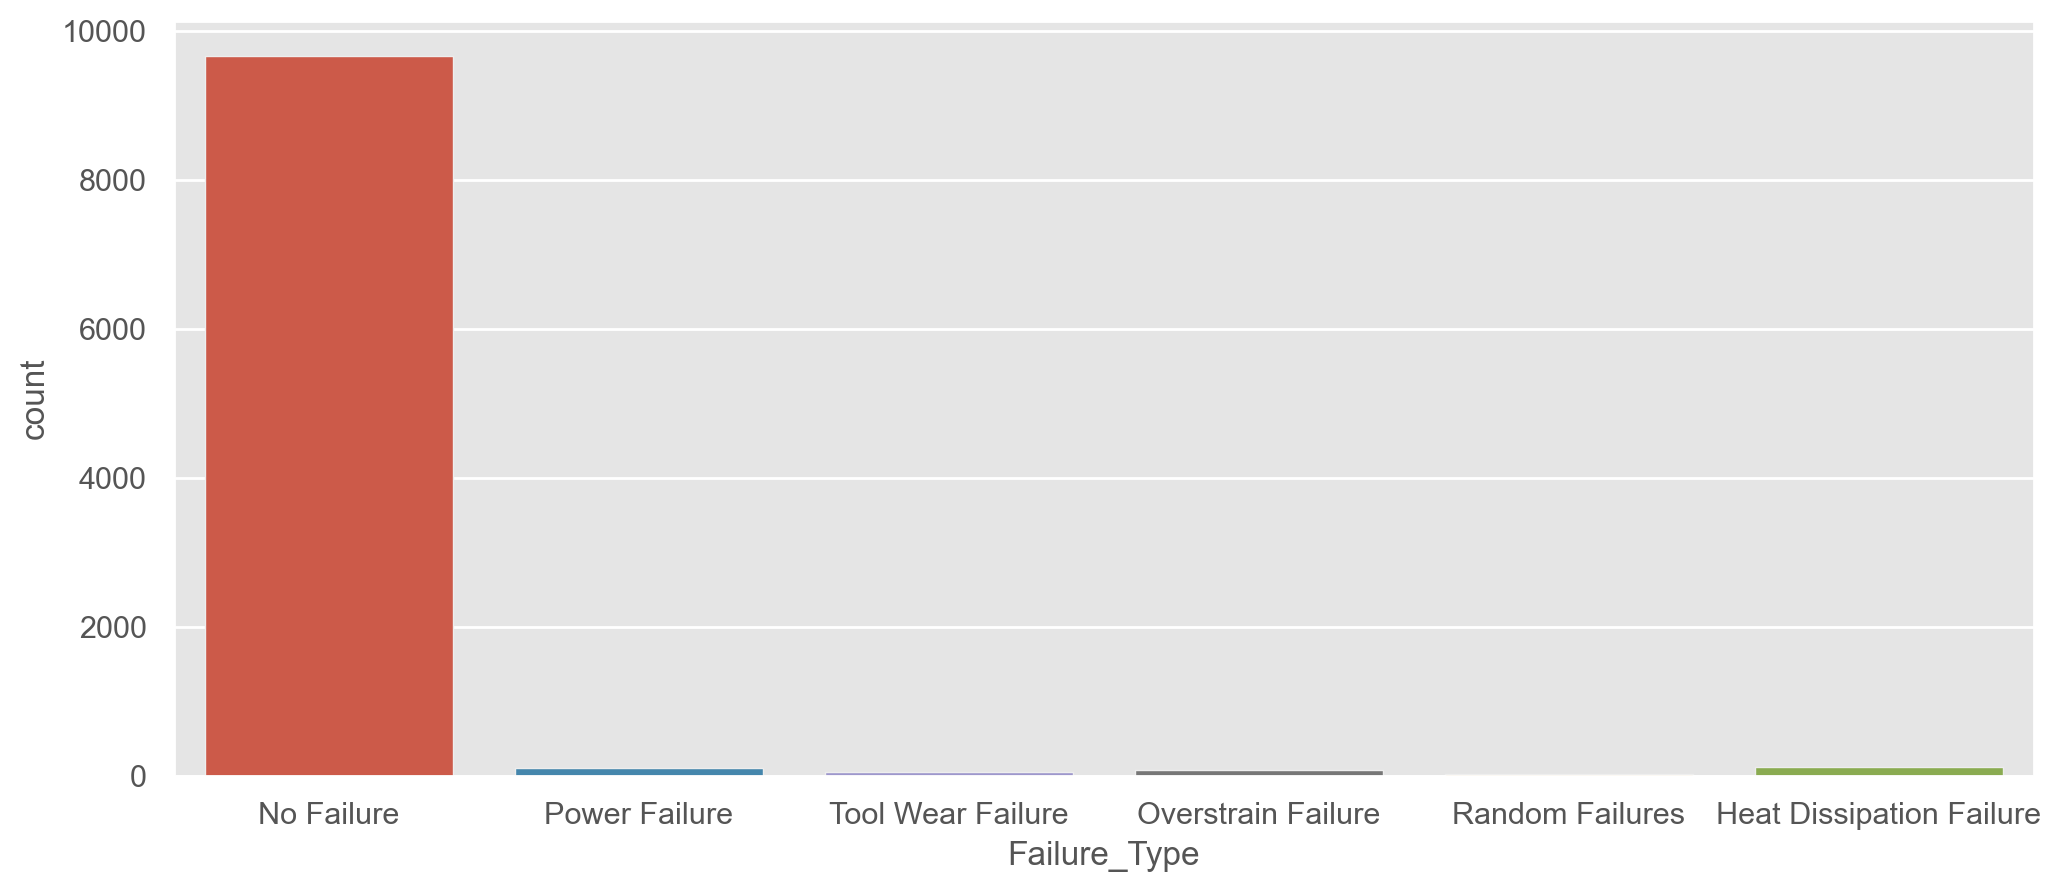

In [120]:
#Failure_Type COUNT

plt.figure(figsize = (12,5), dpi=200)
sns.countplot(df.Failure_Type)

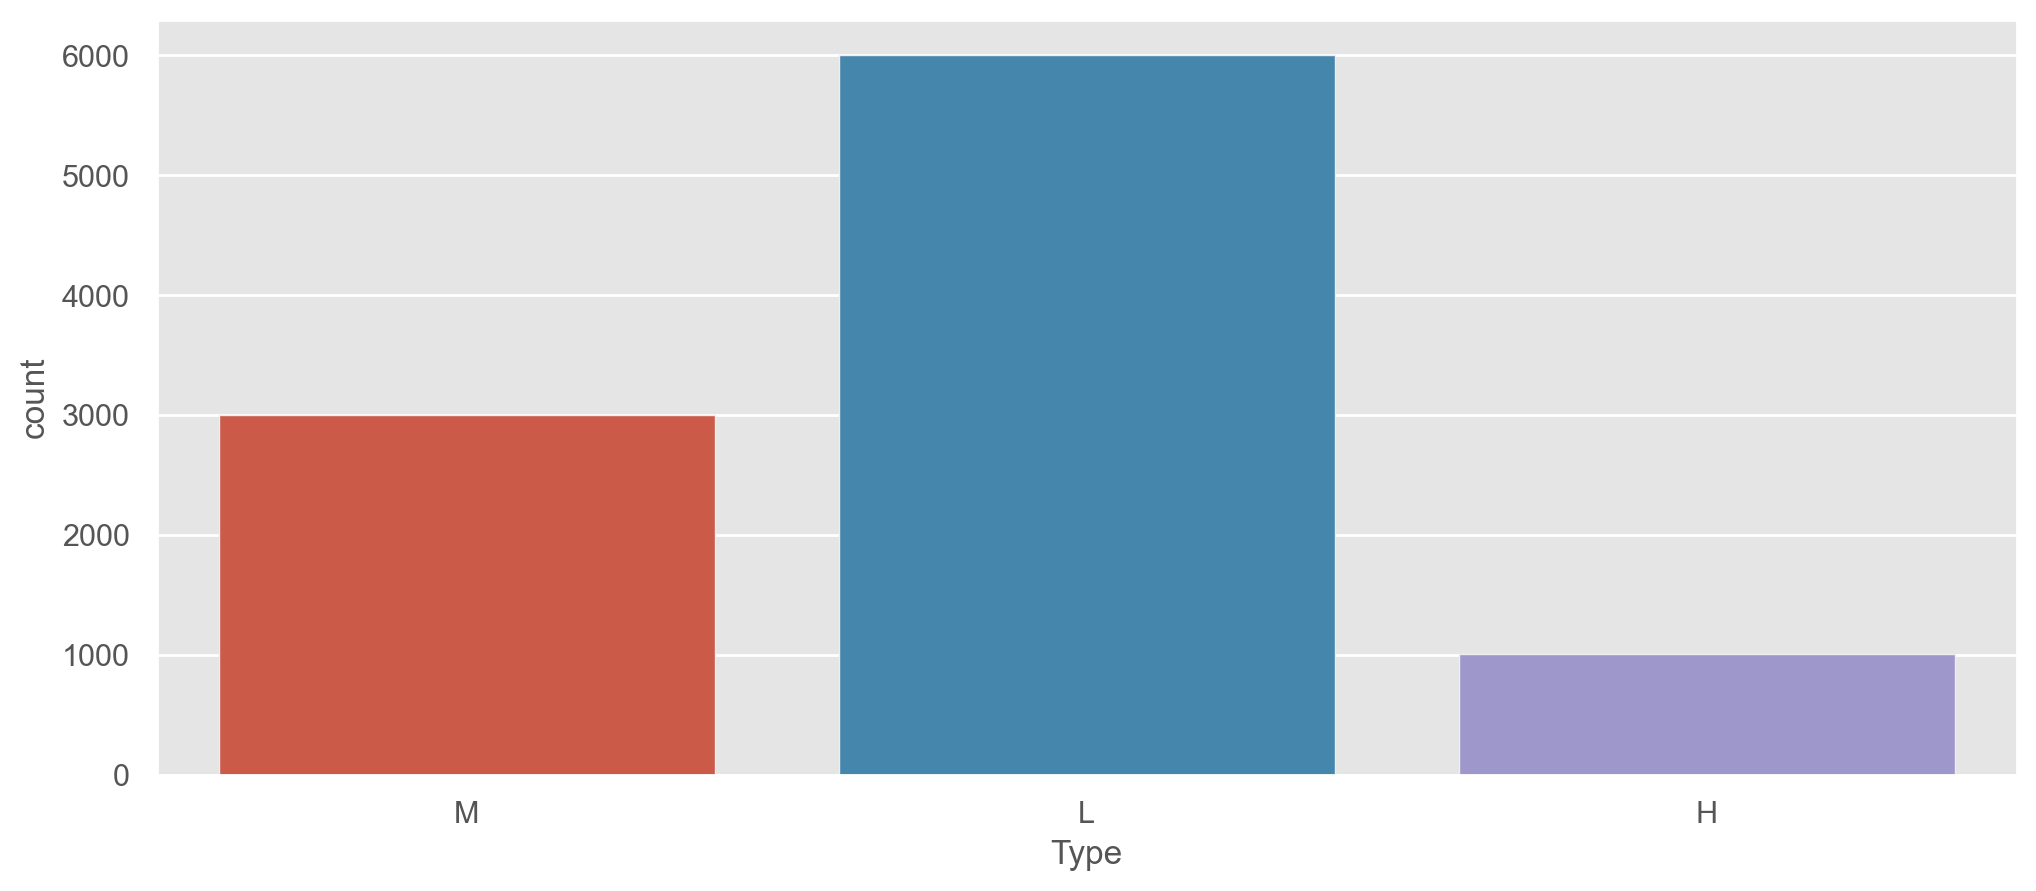

In [127]:
#Type COUNT

plt.figure(figsize = (12,5), dpi=200)
sns.countplot(df.Type)

--Categorical + Categorical--

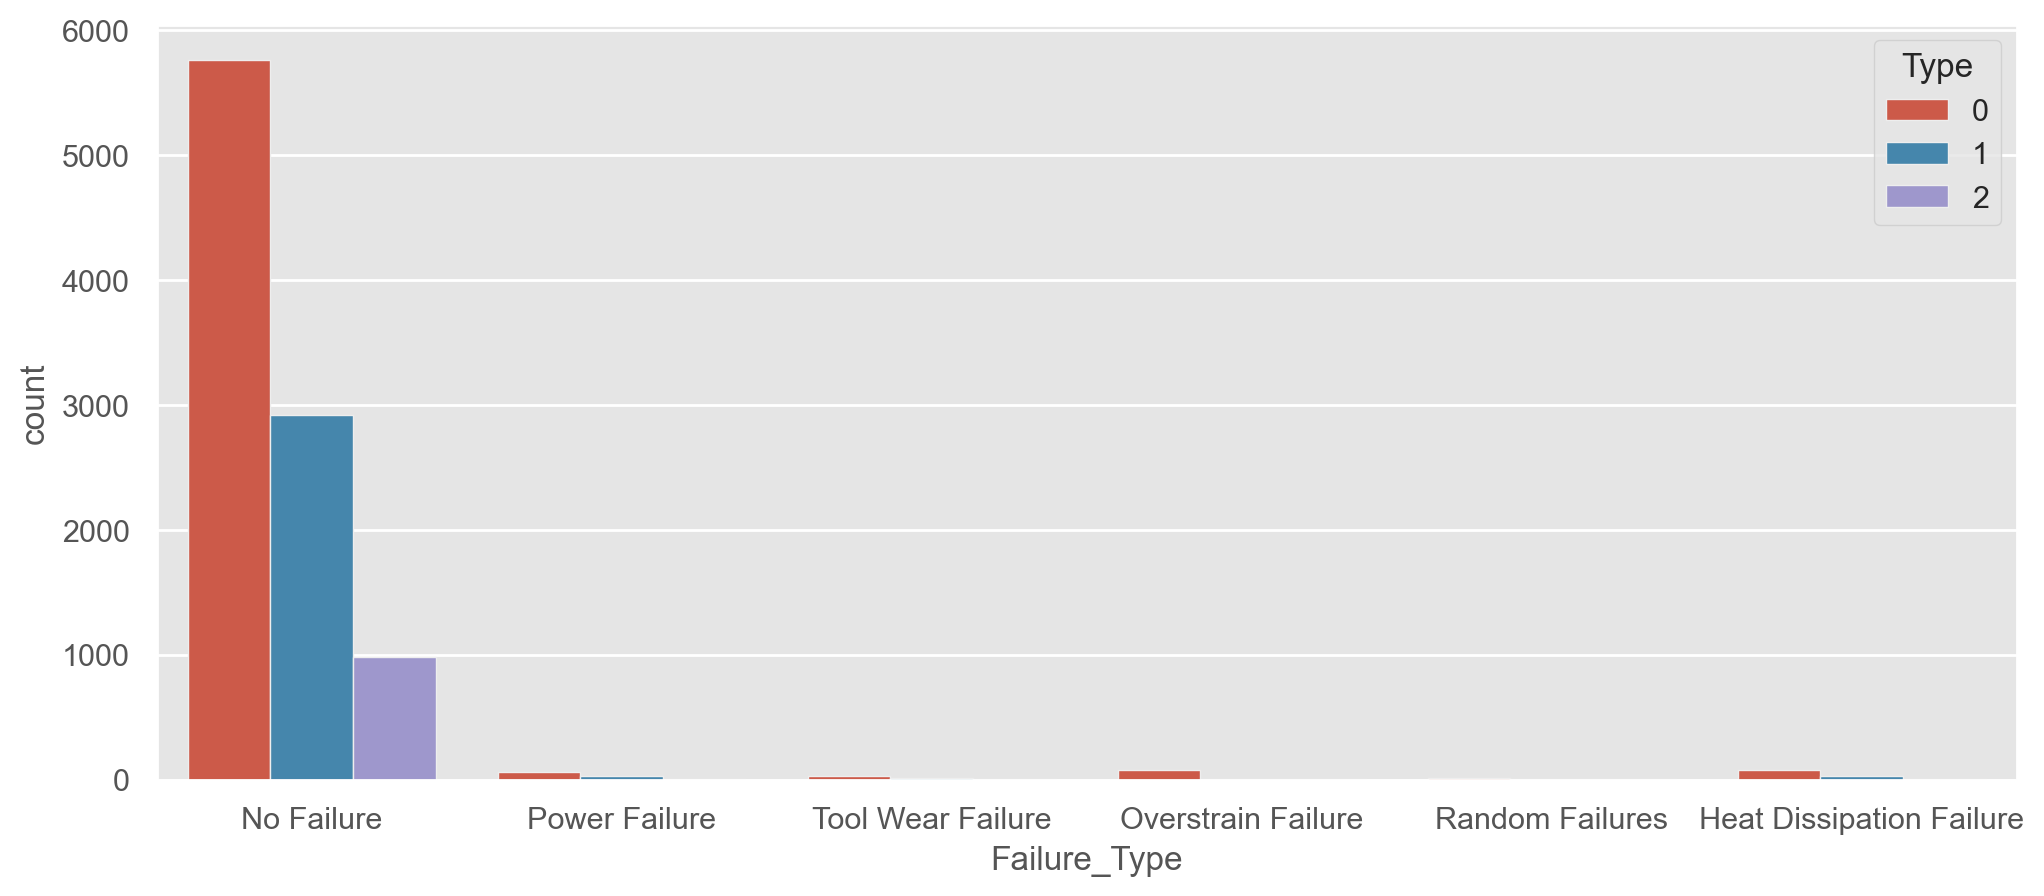

In [237]:
#Failure_Type wrt Type

plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(df.Failure_Type, hue = df.Type)

In [121]:
df.Failure_Type.value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure_Type, dtype: int64

--Numerical--

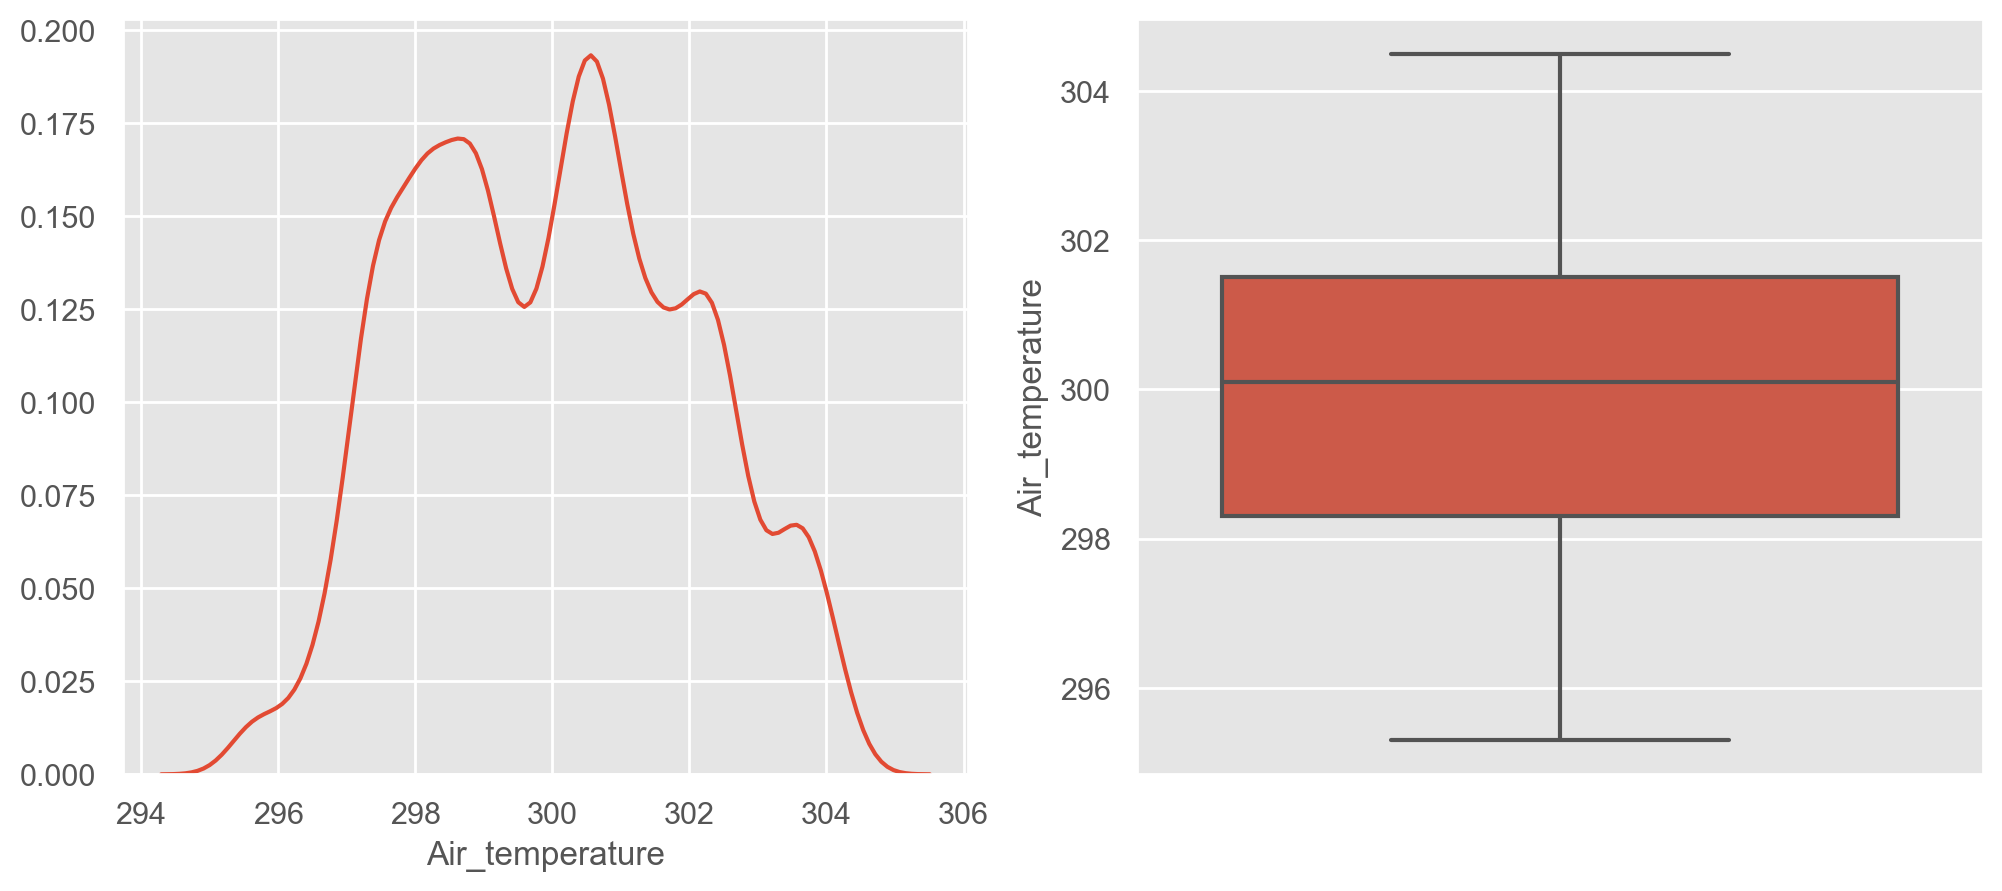

In [122]:
#Air_Temperature DISTRIBUTION

plt.figure(figsize = (12,5), dpi=200)

plt.subplot(1,2,1)
sns.distplot(df.Air_temperature, hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = df.Air_temperature)

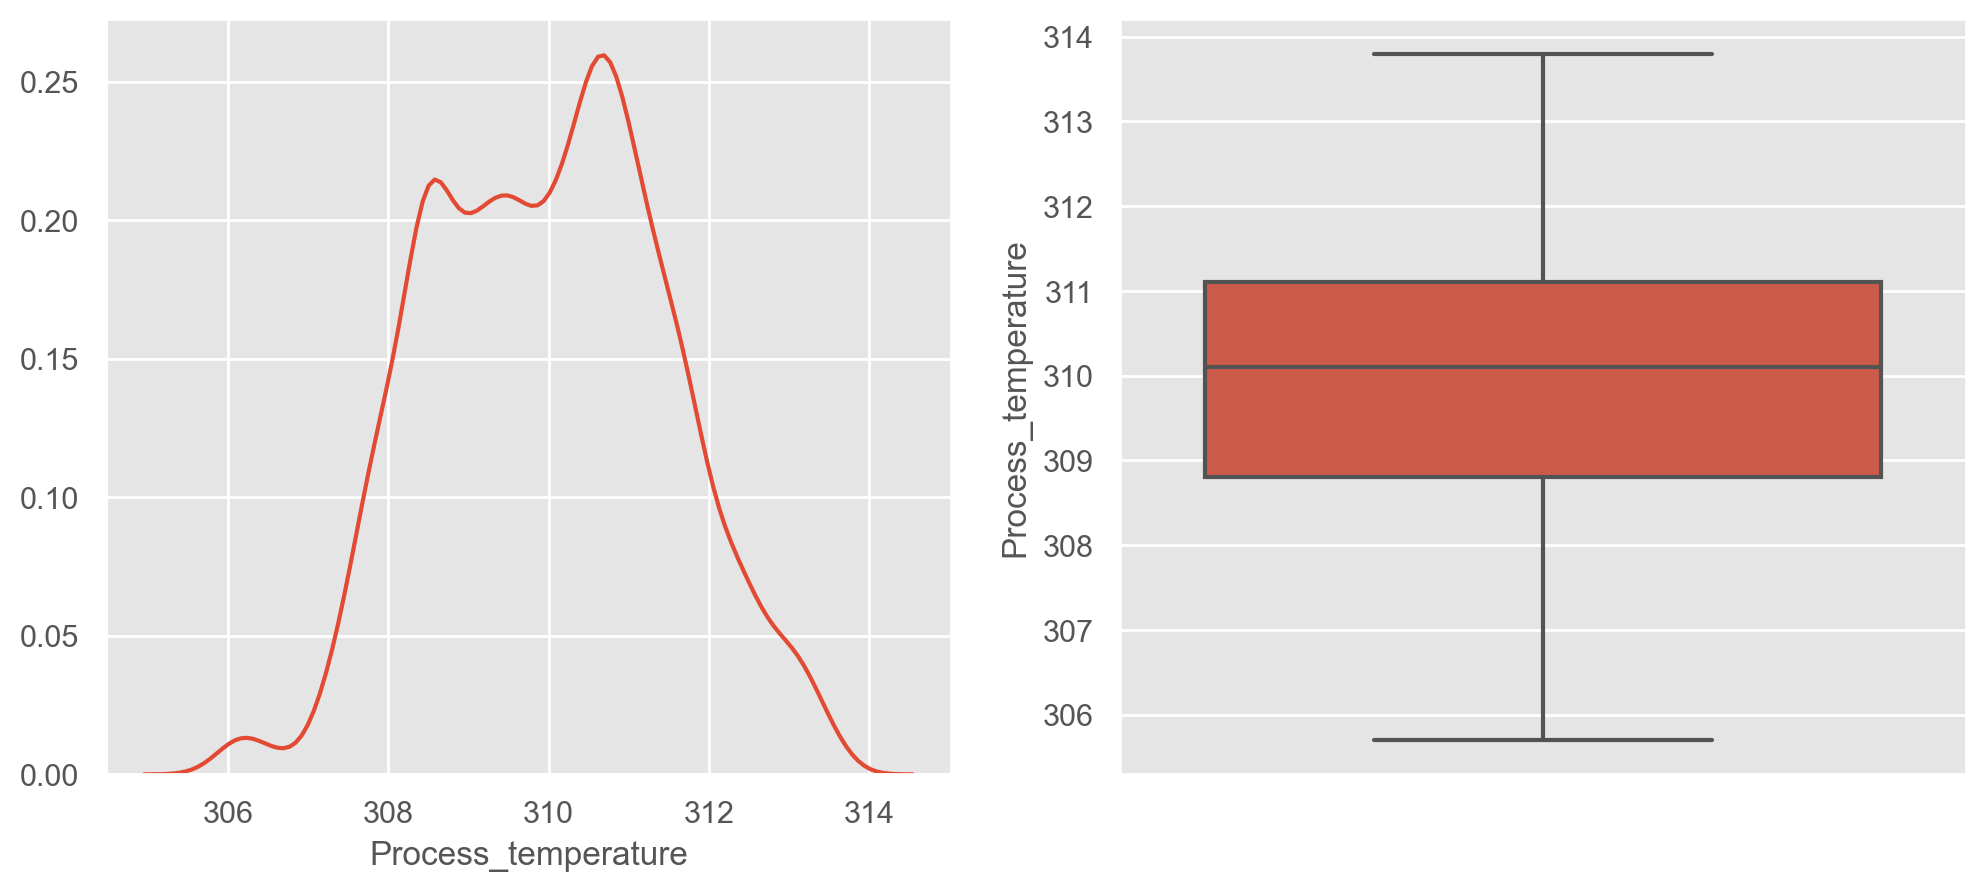

In [123]:
#Process_Temperature DISTRIBUTION

plt.figure(figsize = (12,5), dpi=200)

plt.subplot(1,2,1)
sns.distplot(df.Process_temperature, hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = df.Process_temperature)

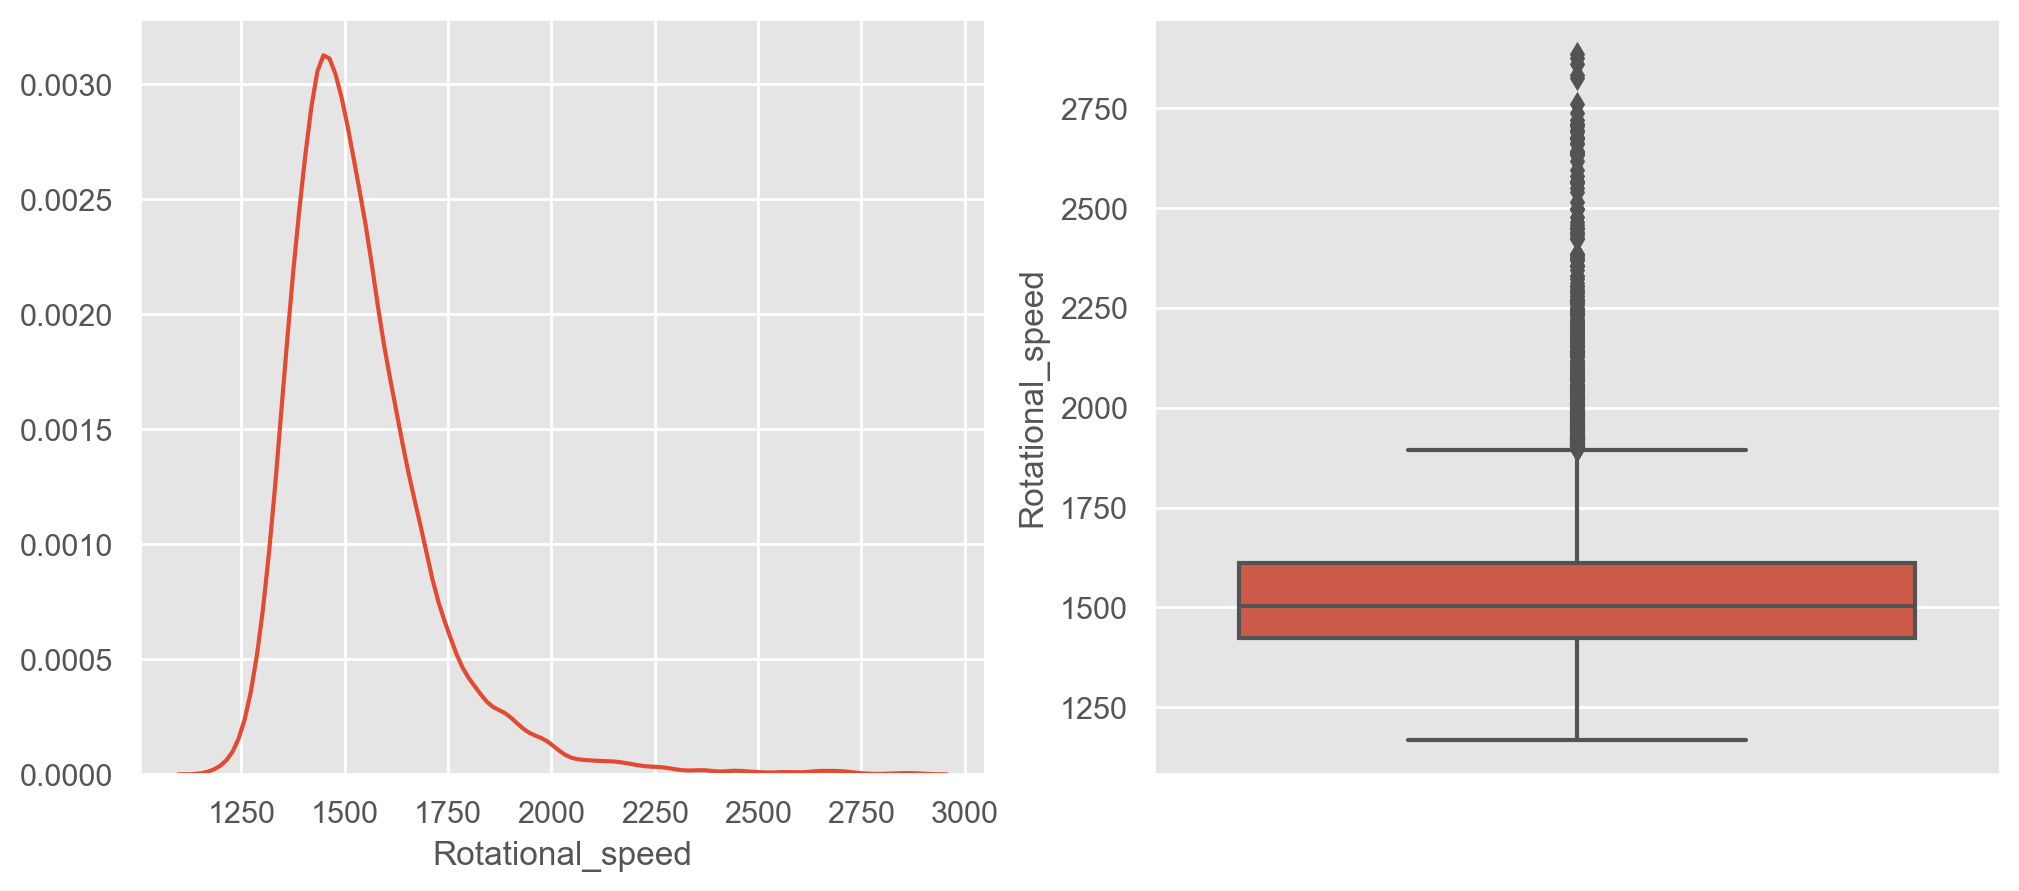

In [124]:
#Rotational_speed DISTRIBUTION

plt.figure(figsize = (12,5), dpi=200)

plt.subplot(1,2,1)
sns.distplot(df.Rotational_speed, hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = df.Rotational_speed)

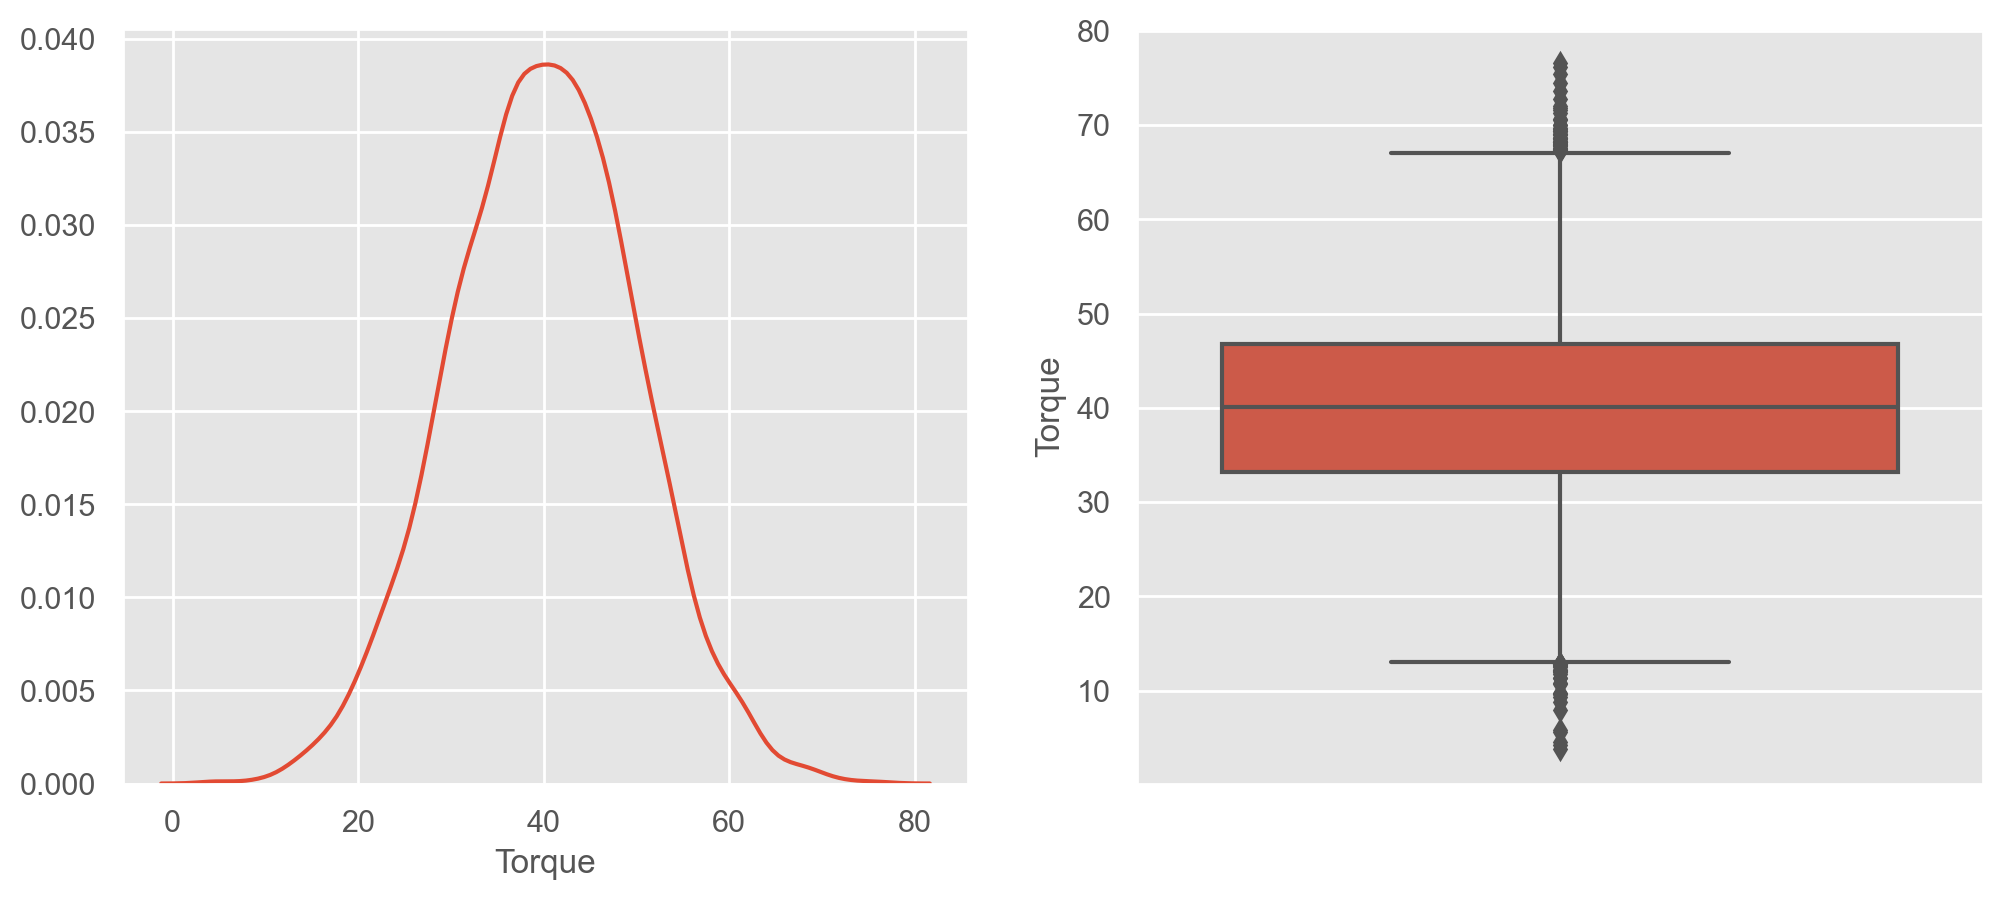

In [125]:
#Torque DISTRIBUTION

plt.figure(figsize = (12,5), dpi=200)

plt.subplot(1,2,1)
sns.distplot(df.Torque, hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = df.Torque)

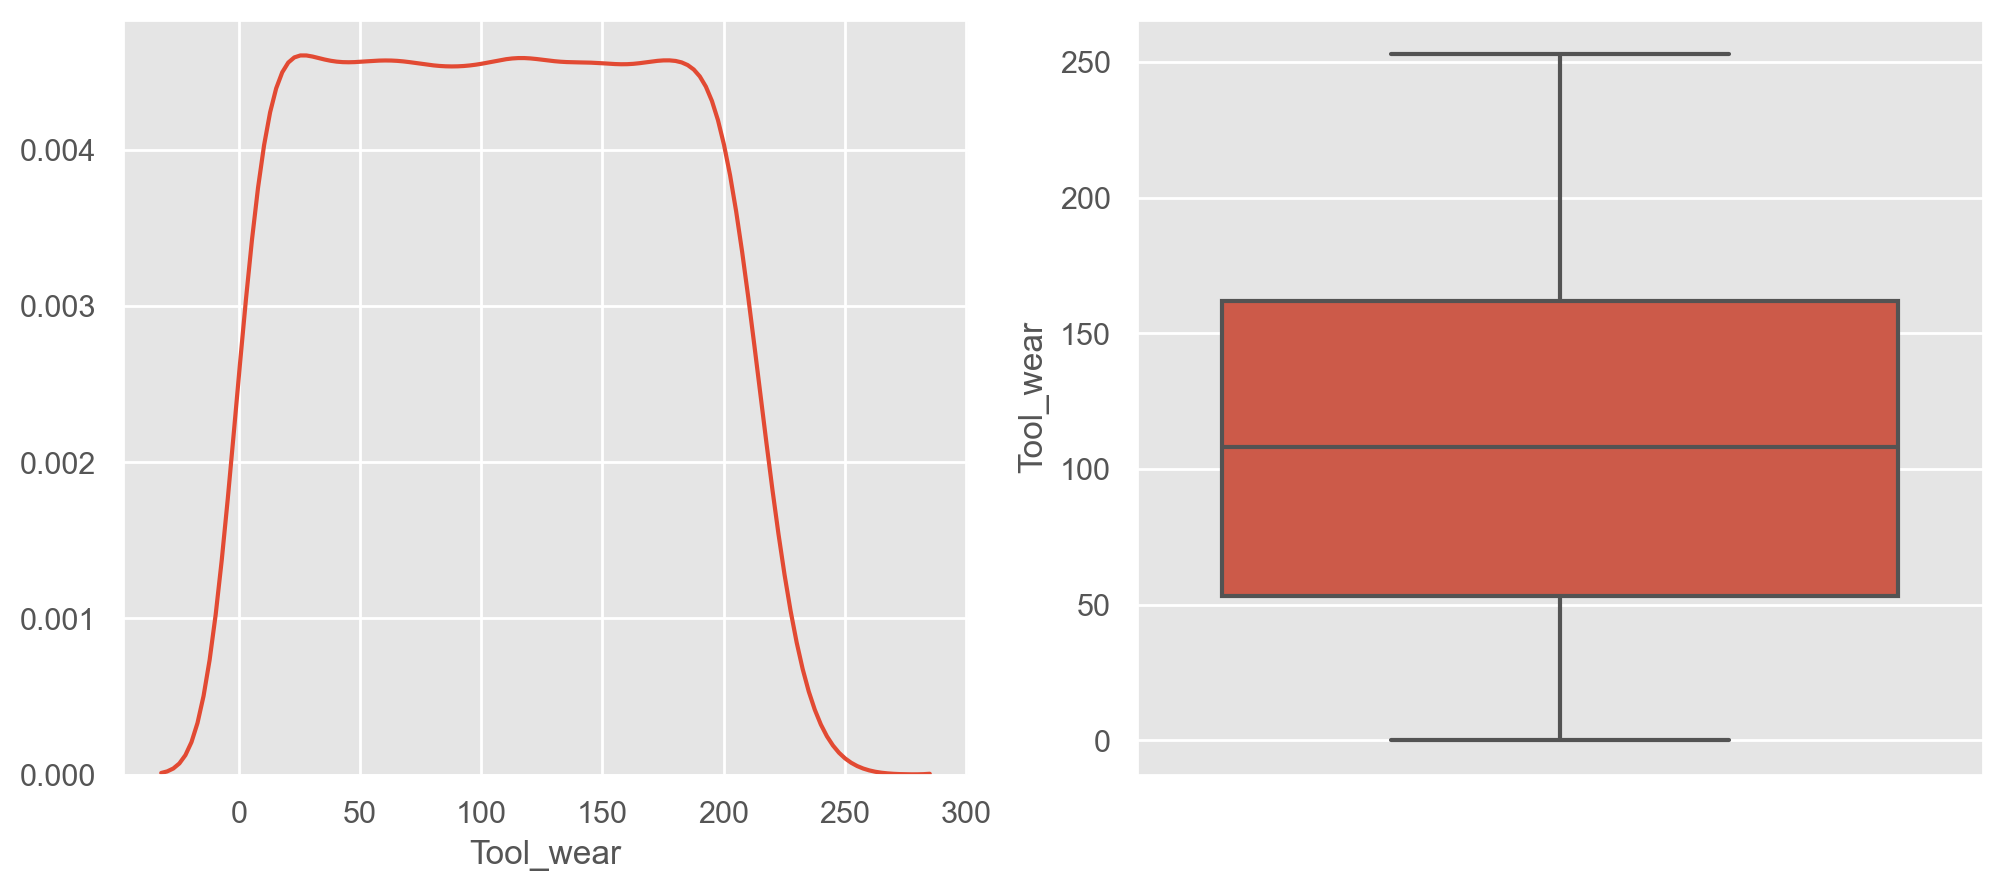

In [126]:
#Tool_wear DISTRIBUTION

plt.figure(figsize = (12,5), dpi=200)

plt.subplot(1,2,1)
sns.distplot(df.Tool_wear, hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = df.Tool_wear)

--Categorical + Numerical--

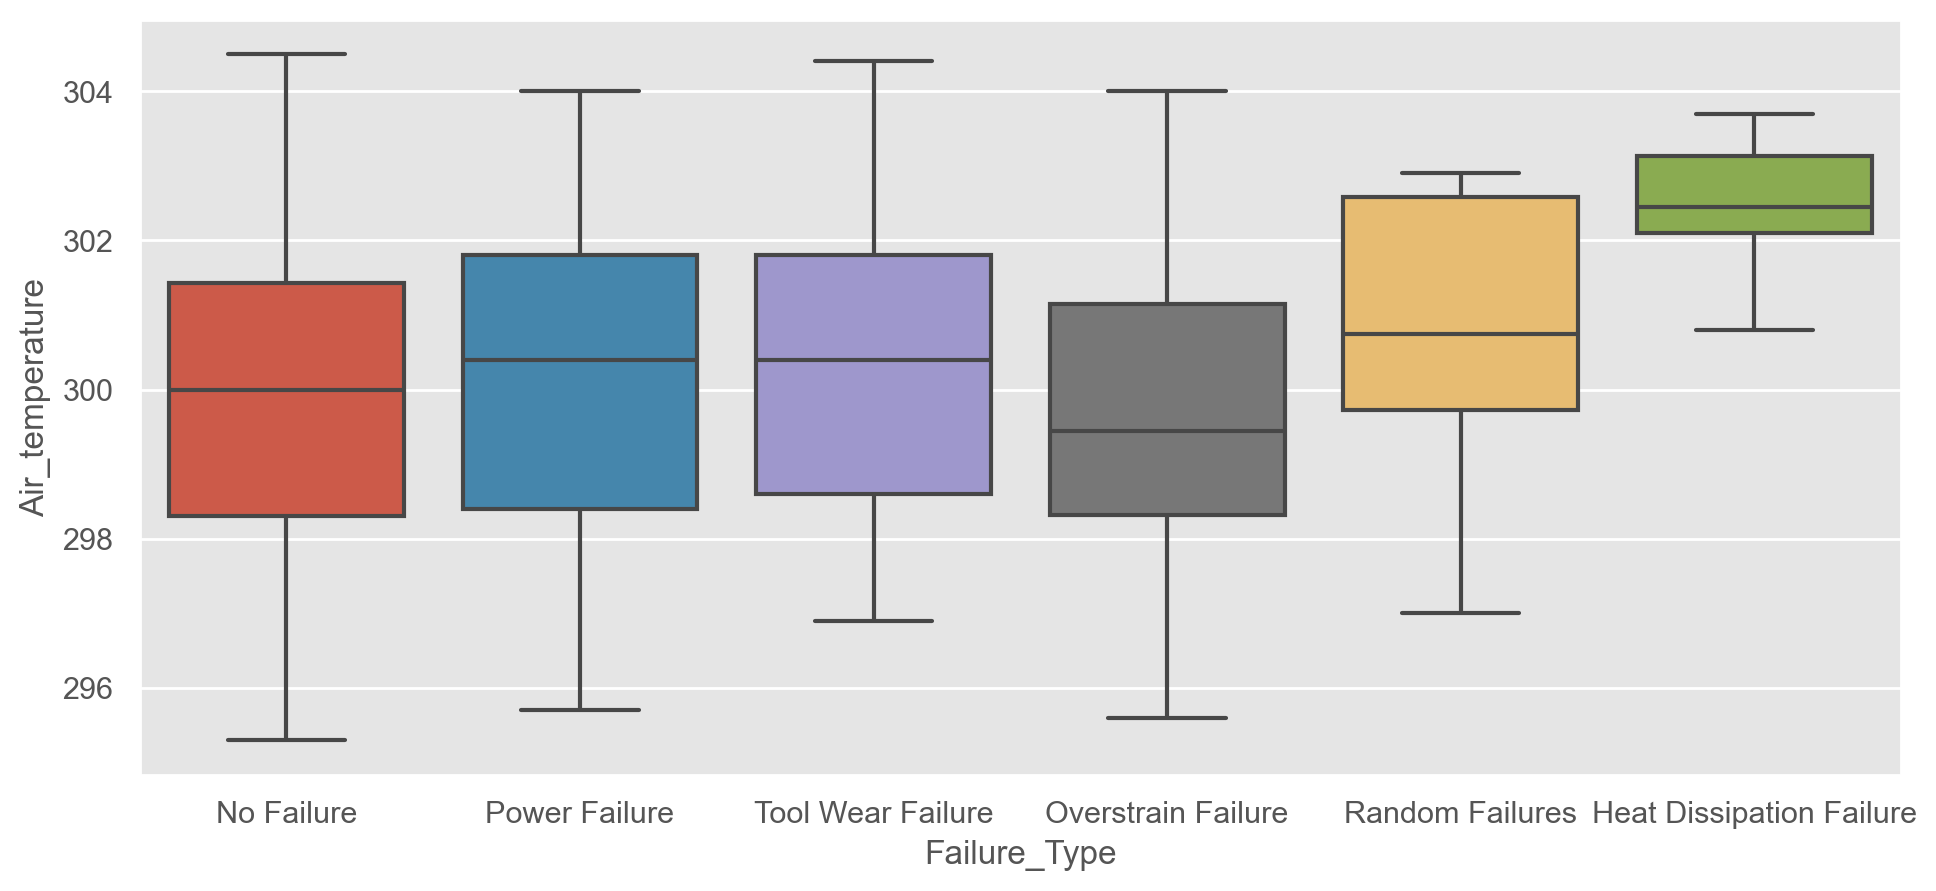

In [148]:
#Failure_Type WRT Air_temperature

plt.figure(figsize = (25,5), dpi = 200)

plt.subplot(1,2,2)
sns.boxplot(df.Failure_Type , df.Air_temperature )

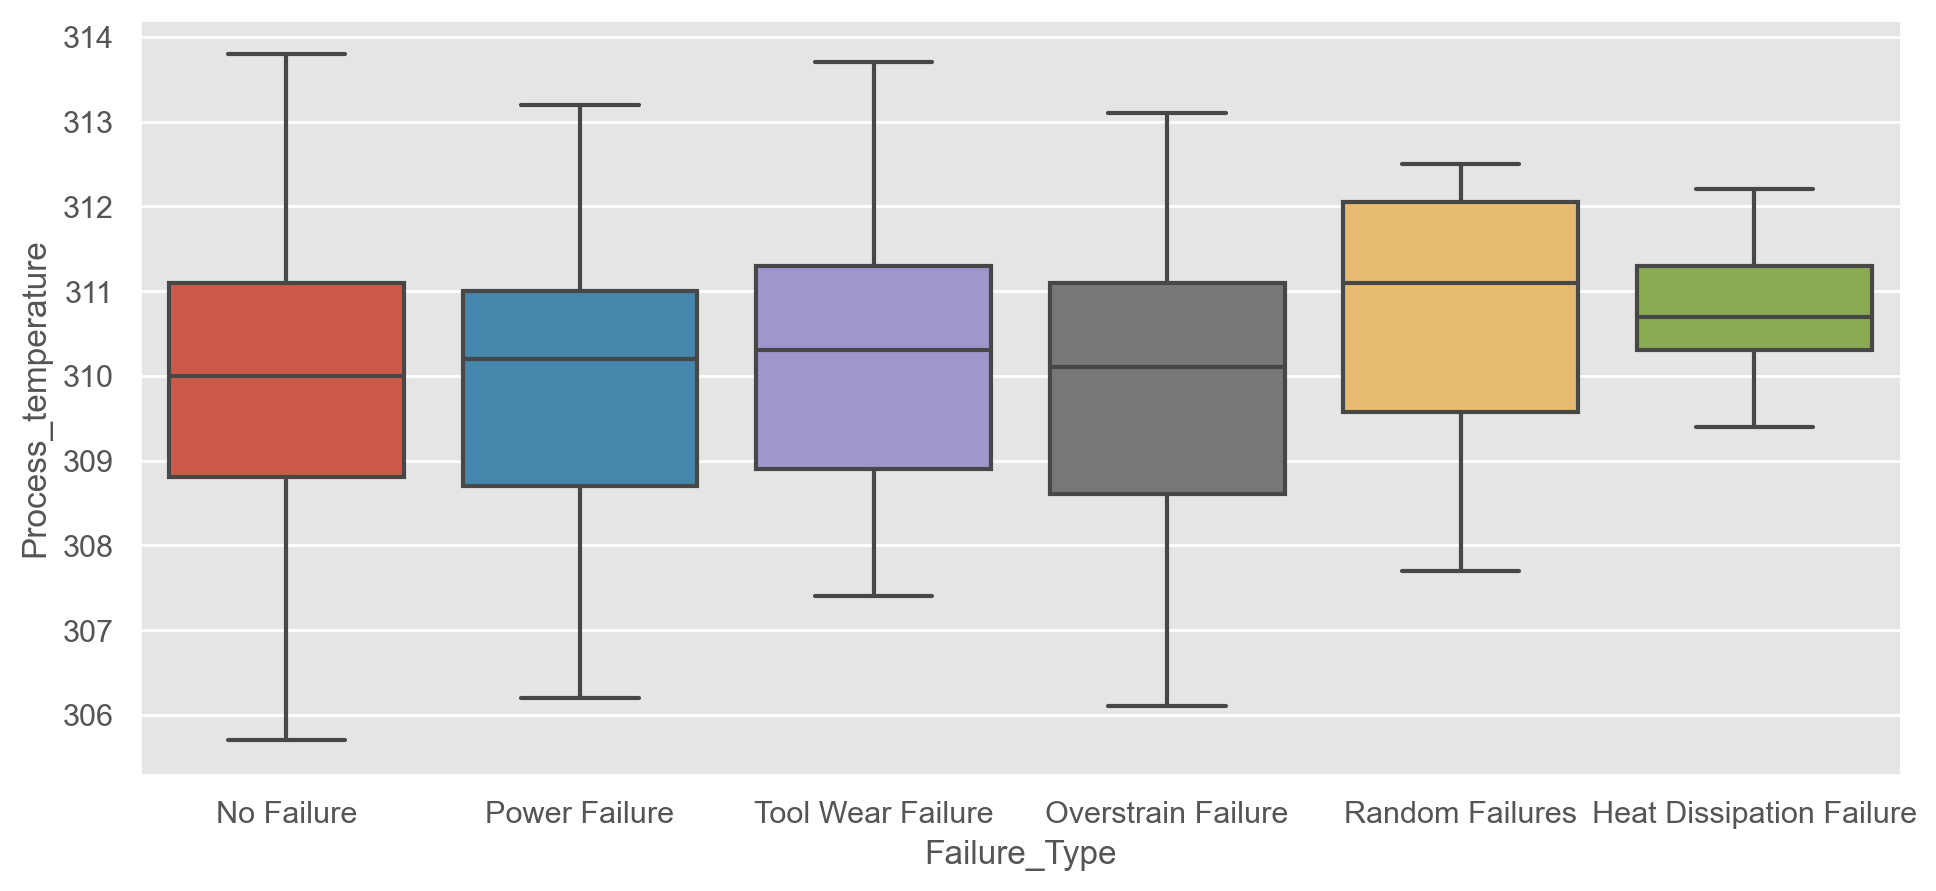

In [151]:
#Failure_Type WRT Process_temperature

plt.figure(figsize = (25,5), dpi = 200)

plt.subplot(1,2,2)
sns.boxplot(df.Failure_Type , df.Process_temperature )

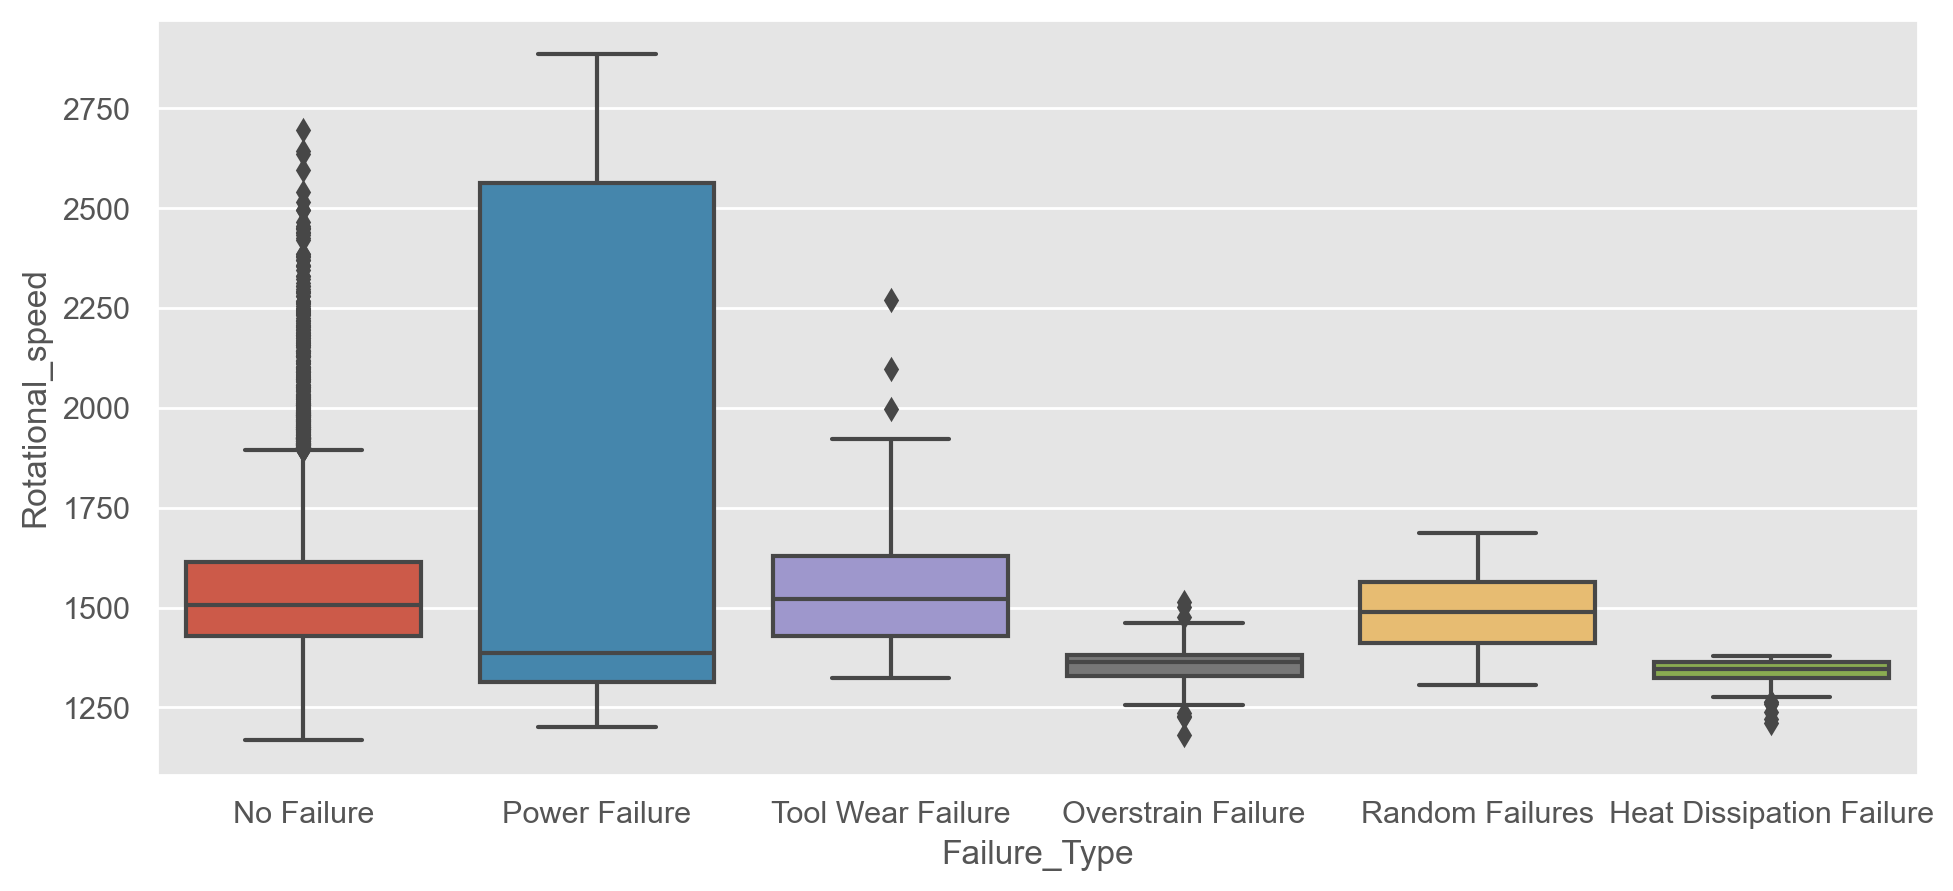

In [211]:
#Failure_Type WRT Rotational_speed

plt.figure(figsize = (25,5), dpi = 200)

plt.subplot(1,2,2)
sns.boxplot(df.Failure_Type , df.Rotational_speed)

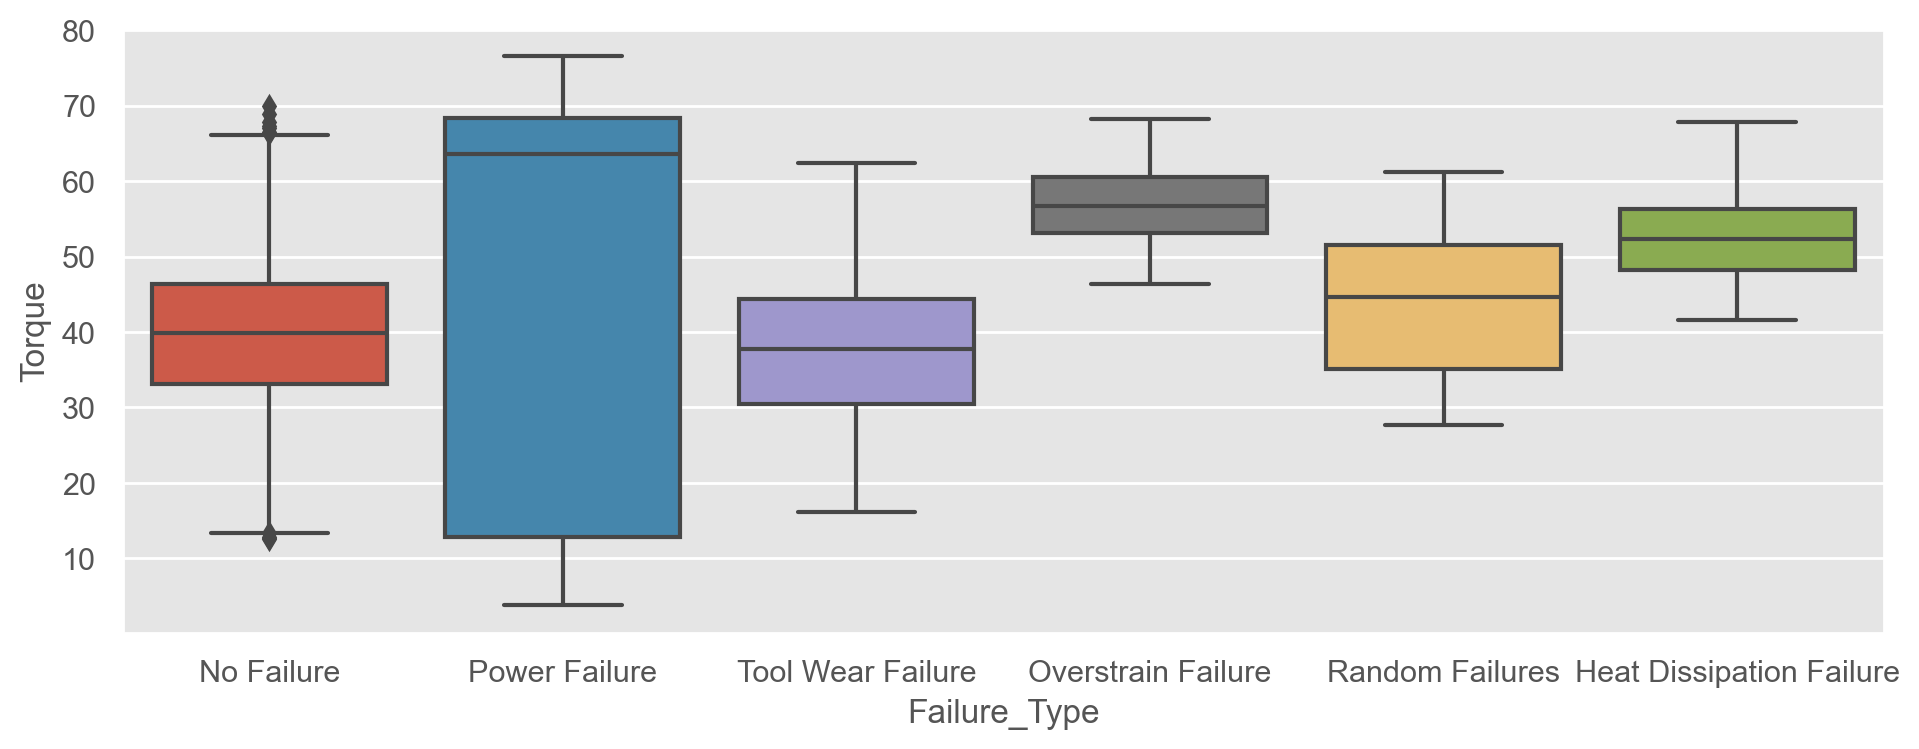

In [203]:
#Failure_Type WRT Torque

plt.figure(figsize = (25,4), dpi = 200)

plt.subplot(1,2,2)
sns.boxplot(df.Failure_Type , df.Torque)

In [173]:
df.Failure_Type.value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure_Type, dtype: int64

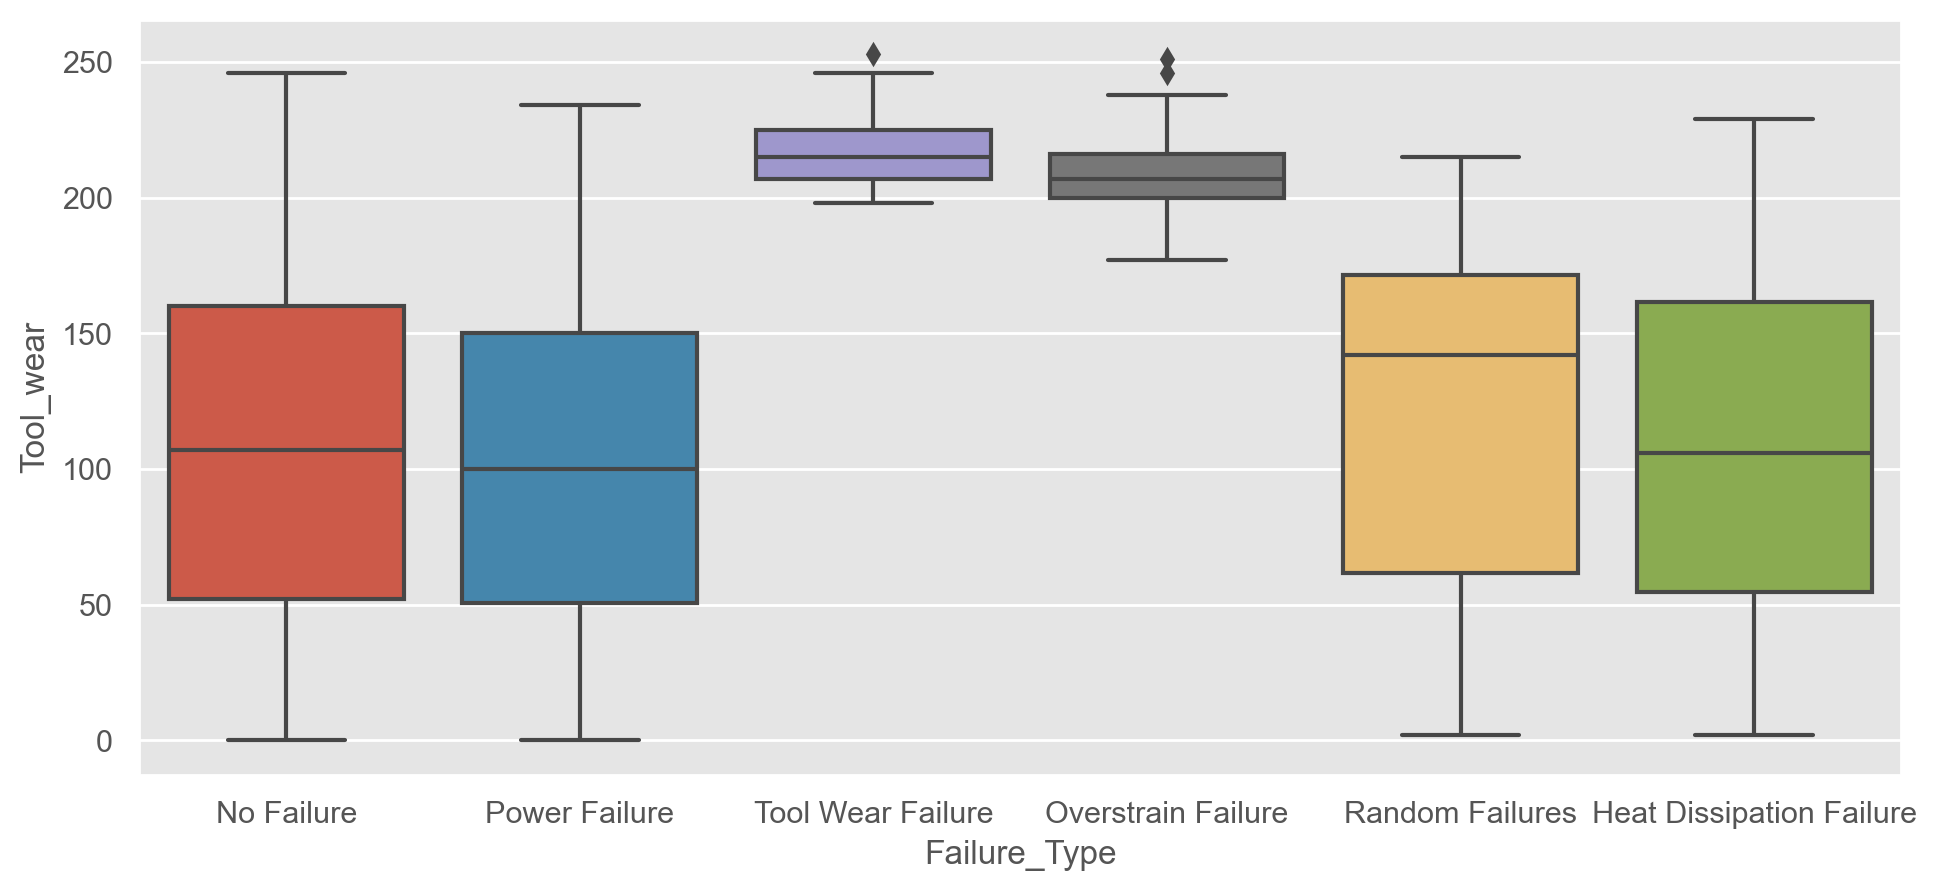

In [205]:
#Failure_Type WRT Tool_wear

plt.figure(figsize = (25,5), dpi = 200)

plt.subplot(1,2,2)
sns.boxplot(df.Failure_Type , df.Tool_wear)


## Mapping categorical values to numbers

In [212]:
df.Type = df.Type.map({'L' : 0, 'M' : 1, 'H' : 2})
df.head()

,UDI,Product ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure_Type
0,1,M14860,1,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,0,298.2,308.7,1408,46.3,3,No Failure
2,3,L47182,0,298.1,308.5,1498,49.4,5,No Failure
3,4,L47183,0,298.2,308.6,1433,39.5,7,No Failure
4,5,L47184,0,298.2,308.7,1408,40.0,9,No Failure


## Training the model

In [214]:
cols = ['Type','Air_temperature','Process_temperature','Rotational_speed','Torque','Tool_wear']
X = df[cols].values
Y = df[['Failure_Type']].values

In [215]:
X[:10]

array([[1.000e+00, 2.981e+02, 3.086e+02, 1.551e+03, 4.280e+01, 0.000e+00],
       [0.000e+00, 2.982e+02, 3.087e+02, 1.408e+03, 4.630e+01, 3.000e+00],
       [0.000e+00, 2.981e+02, 3.085e+02, 1.498e+03, 4.940e+01, 5.000e+00],
       [0.000e+00, 2.982e+02, 3.086e+02, 1.433e+03, 3.950e+01, 7.000e+00],
       [0.000e+00, 2.982e+02, 3.087e+02, 1.408e+03, 4.000e+01, 9.000e+00],
       [1.000e+00, 2.981e+02, 3.086e+02, 1.425e+03, 4.190e+01, 1.100e+01],
       [0.000e+00, 2.981e+02, 3.086e+02, 1.558e+03, 4.240e+01, 1.400e+01],
       [0.000e+00, 2.981e+02, 3.086e+02, 1.527e+03, 4.020e+01, 1.600e+01],
       [1.000e+00, 2.983e+02, 3.087e+02, 1.667e+03, 2.860e+01, 1.800e+01],
       [1.000e+00, 2.985e+02, 3.090e+02, 1.741e+03, 2.800e+01, 2.100e+01]])

In [217]:
Y[:10]

array([['No Failure'],
       ['No Failure'],
       ['No Failure'],
       ['No Failure'],
       ['No Failure'],
       ['No Failure'],
       ['No Failure'],
       ['No Failure'],
       ['No Failure'],
       ['No Failure']], dtype=object)

In [218]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=4)

In [219]:
print('Training Data shape : ',x_train.shape)
print('Training Labels shape : ',y_train.shape)
print('Testing Data shape : ',x_test.shape)
print('Testing Labels shape : ',y_test.shape)

Training Data shape :  (7000, 6)
Training Labels shape :  (7000, 1)
Testing Data shape :  (3000, 6)
Testing Labels shape :  (3000, 1)


In [220]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [221]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

In [222]:
from sklearn.metrics import accuracy_score
print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.9692857142857143
Testing Accuracy  :  0.972


## Finding the best value of k

In [223]:
acc_train = []
acc_test  = []

for i in range(1,21):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(x_train, y_train)
    
    pred_train = classifier.predict(x_train)
    pred_test  = classifier.predict(x_test)
    
    acc_train.append(accuracy_score(y_train, pred_train))
    acc_test.append(accuracy_score(y_test, pred_test))

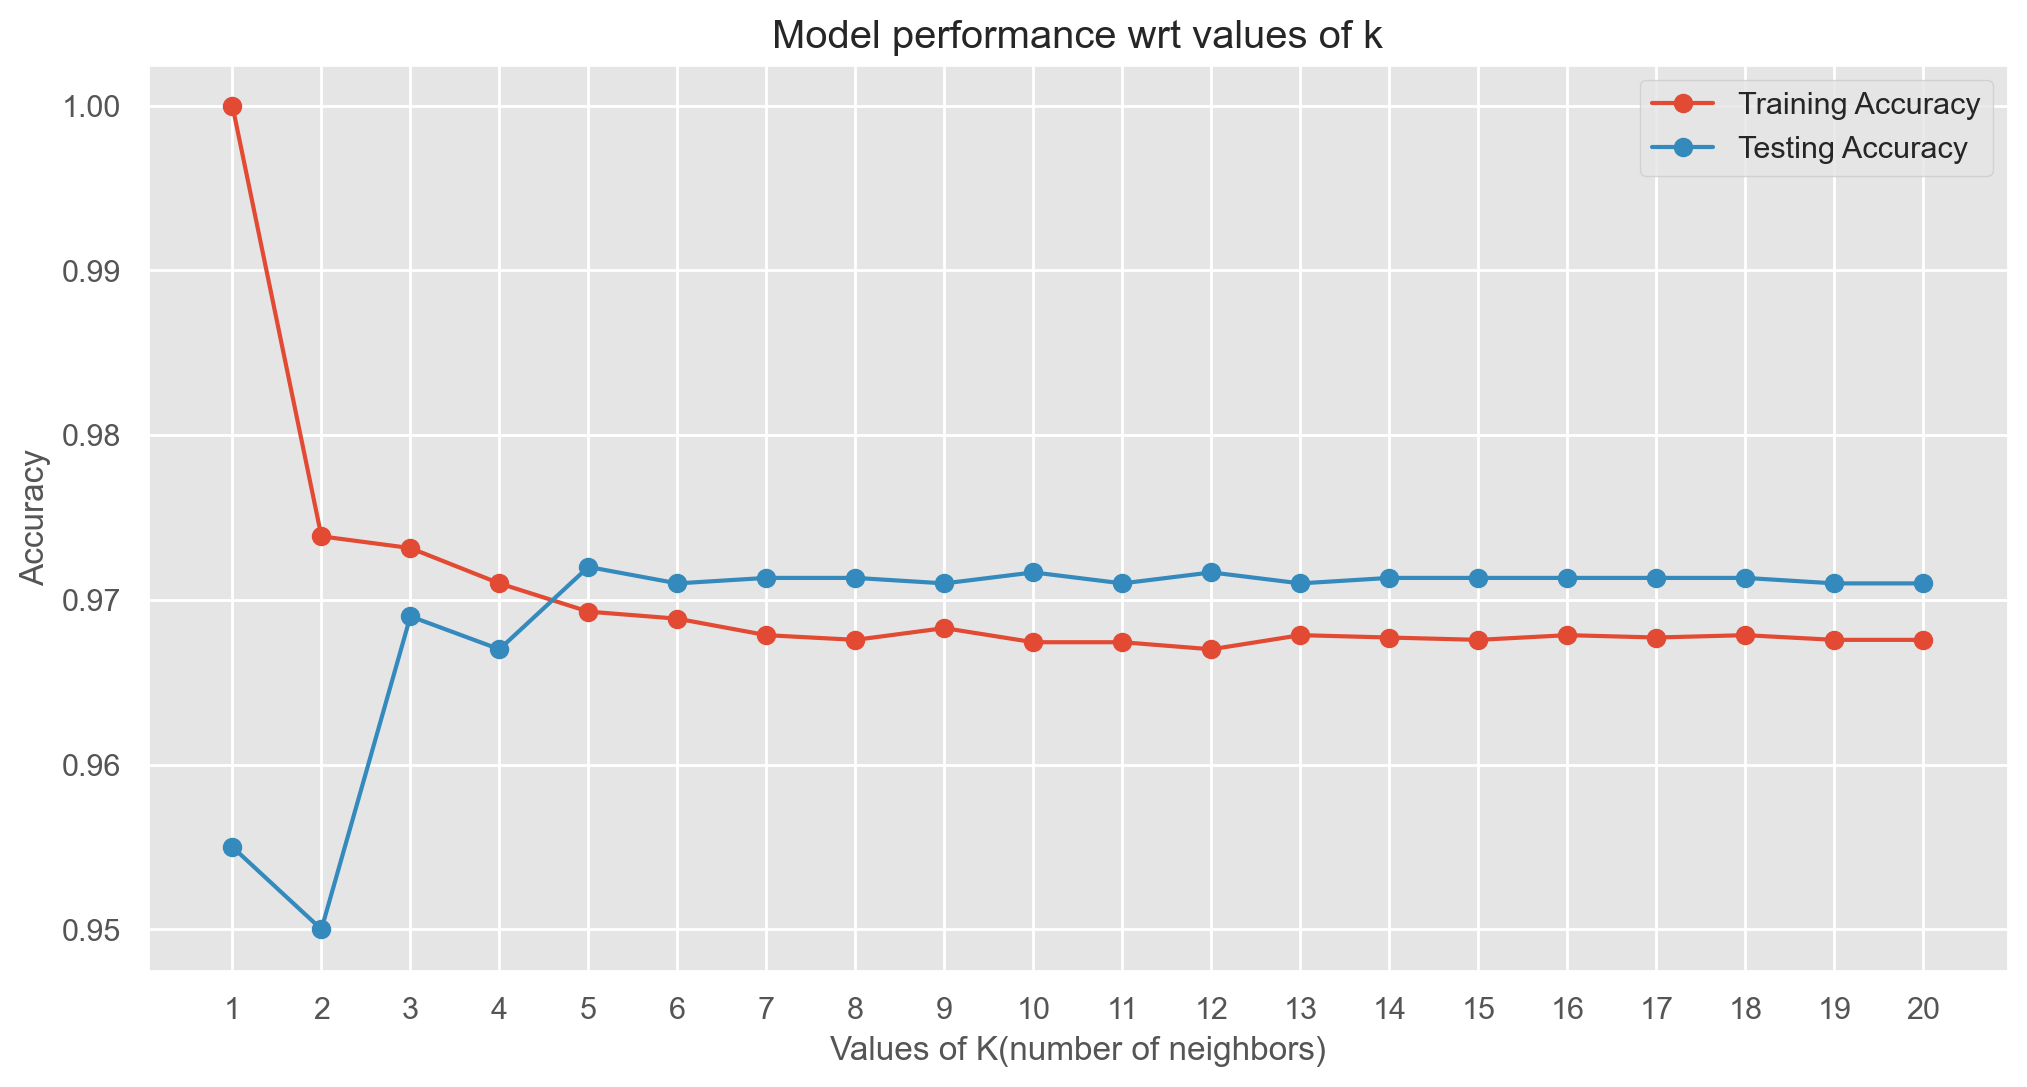

In [224]:
plt.figure(figsize = (12,6), dpi = 200)
plt.plot(range(1,21), acc_train, '-o', label = 'Training Accuracy')
plt.plot(range(1,21), acc_test, '-o', label = 'Testing Accuracy')

plt.title('Model performance wrt values of k')
plt.xlabel('Values of K(number of neighbors)')
plt.ylabel('Accuracy')
plt.xticks(range(1,21))
plt.legend()

In [241]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [242]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

In [243]:
print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.9731428571428572
Testing Accuracy  :  0.969


In [245]:
classifier.predict(x_test[0:4])

array(['No Failure', 'No Failure', 'No Failure', 'No Failure'],
      dtype=object)

In [244]:
classifier.predict(x_test[200:250])

array(['No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'Overstrain Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure',
       'Heat Dissipation Failure', 'No Failure', 'No Failure'],
      dtype=object)